In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', 500)

In [258]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [259]:
display(df.info(),df.describe(), df.describe(exclude='number'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

None

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


## CLEANING DATA

### NULL VALUE

In [260]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [261]:
#Car NaN -> 0
df['Car'].fillna(0, inplace=True)

#BuildingArea NaN -> 0
df['BuildingArea'].fillna(0, inplace=True)

#BuildingArea NaN -> 0
df['YearBuilt'].fillna(0, inplace=True)

#CouncilArea NaN -> Undecided, karena satu regionname ada banyak council area
df['CouncilArea'].fillna('Undecided', inplace=True)

df.isnull().sum()


Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### Anomali

In [262]:
len(df) #13580

#Landsize dan Area 0
df.drop(df[(df['Landsize']==0)&(df['BuildingArea']==0)].index,inplace=True)  #878

#Landsize 0 dan Area >0
df[df['Landsize']==0] #1061
df['Landsize'] = np.where(df['BuildingArea'] > 0, df['BuildingArea'], df['Landsize'])
df[df['Address']=='123/56 Nicholson St']	

len(df)


12702

In [263]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,12702.000000,1.270200e+04,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000,12702.000000
mean,3.005668,1.104239e+06,10.400551,3104.787356,2.980318,1.556841,1.637301,407.697870,85.303837,1226.559203,-37.807955,144.995397,7409.529917
std,0.933148,6.433928e+05,5.907975,92.345039,0.946031,0.696898,0.977184,4077.638161,412.281649,951.666601,0.080773,0.106565,4393.271256
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.750000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,115.000000,0.000000,0.000000,-37.856972,144.926500,4242.000000
50%,3.000000,9.300000e+05,9.700000,3084.000000,3.000000,1.000000,2.000000,187.000000,69.000000,1930.000000,-37.799650,145.000815,6543.000000
75%,4.000000,1.355000e+06,13.100000,3147.000000,4.000000,2.000000,2.000000,503.000000,133.000000,1975.000000,-37.753343,145.061665,10175.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# SOAL

## NOMOR 1

a) Buatlah Histogram untuk menampilkan distribusi data harga rumah (kolom “Price”)!

b) Tambahkan judul “Distribusi Harga Rumah” berukuran 15!

c) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

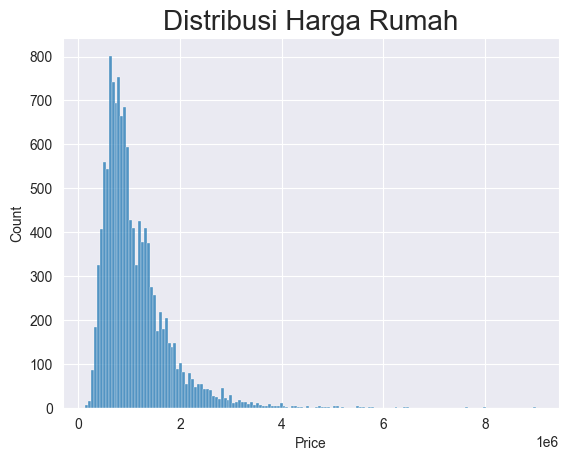

In [264]:
plt.figure()
sns.histplot((df['Price']))

plt.title('Distribusi Harga Rumah', size=20)
plt.show()

**INSIGHT:**
- Harga rumah tersdistribusi sampai dengan AUD 9,000,000
- Harga rumah pada daerah tersebut didominasi dengan rentan harga sampai dengan AUD 2,000,000.
- Harga rumah terbanyak ada pada sekitar AUD 1,000,000

## NOMOR 2

a) Buatlah Box Plot untuk menampilkan distribusi data jarak ke CBD (kolom “Distance”)!

b) Buatlah Box Plot “Distance” untuk tiap nama region (kolom “Regionname”)!

c) Tambahkan judul ‘Distribusi Jarak ke CBD berdasarkan Nama Region’ berukuran 15!

d) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

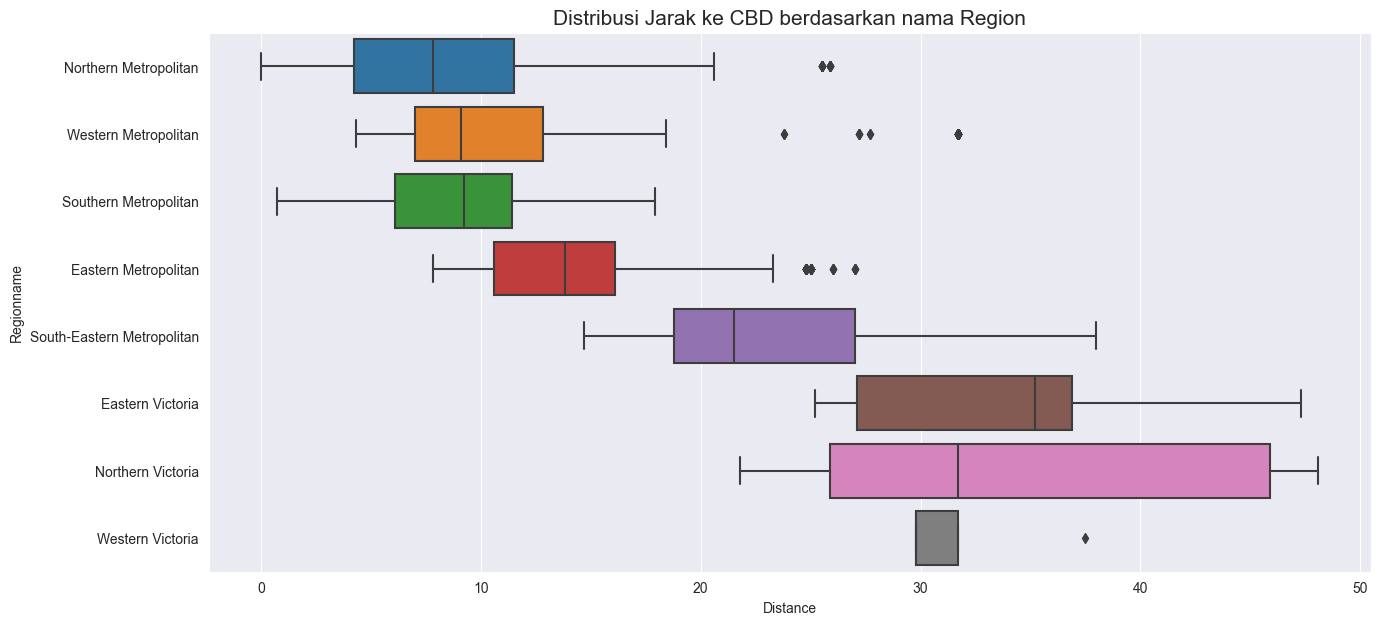

In [265]:
plt.figure(figsize=(15,7))

sns.boxplot(
    data=df,
    x = 'Distance',
    y = 'Regionname'
)

plt.title('Distribusi Jarak ke CBD berdasarkan nama Region',size=15)

plt.show()

**INSIGHT:**
- Jarak region ke CBD tersebar dengan rentang sampai dengan 48 Km.
- Pada region Metropolitan (kecuali South-Eastern) jarak antara rumah dengan CBD relatif lebih dekat dengan dominasi antara 5-15 Km.
- PAda Region Victoria semua rumah beada pada jarak lebih dari 20 Km dari kawasan CBD
- Sedangkan untuk Kawasan South-Eastern Metropolitan tersebar pada jarak 15 - 39 Km dengan dominasi banyaknya antara 20-30 Km.

## NOMOR 3

a) Buatlah Bar Plot (diagram batang) untuk membandingkan nilai median harga rumah (kolom “Price”) di tiap tipe rumah (kolom “Type”)!

b) Tambahkan judul ‘Perbandingan Nilai Median Harga Rumah’ berukuran 15!

c) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

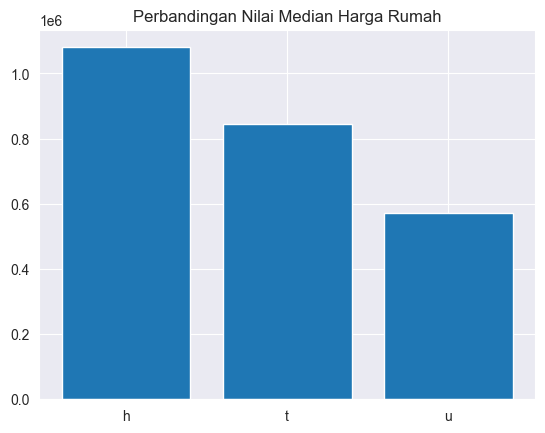

In [273]:
dfPriceTypeMedian = df.groupby('Type')['Price'].median().reset_index()

plt.figure()

plt.bar(
    data = dfPriceTypeMedian,
    x = 'Type',
    height = 'Price',
)

plt.title('Perbandingan Nilai Median Harga Rumah'
          )
plt.show()


**INSIGHT:**

- Nilai harga rumah dengan tipe H memiliki kecendrungan lebih tinggi dari rumah lainnya, disusul dengan tipe T kemudian U.

## NOMOR 4

a) Buatlah Scatter Plot (diagram titik) untuk menampilkan korelasi antara harga rumah (kolom “Price”) dengan Jarak ke CBD (kolom “Distance”)!

b) Bedakan warna titik berdasarkan tipe rumah (kolom “Type”)!

c) Tambahkan judul ‘Korelasi Harga Rumah dan Jarak Rumah ke CBD’
berukuran 15!

d) Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

,Price,Distance
Price,1.000000,-0.200342
Distance,-0.200342,1.000000


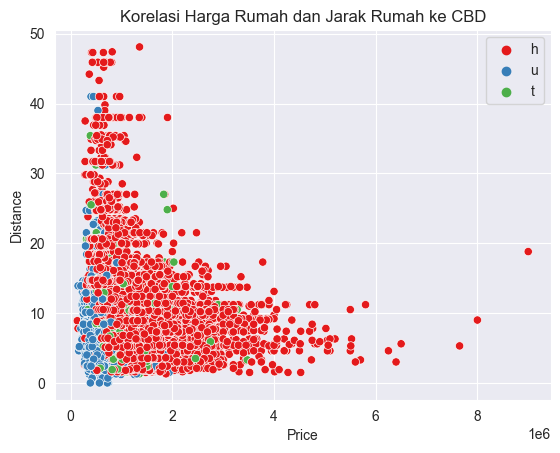

In [274]:
df[['Price', 'Distance']].corr(method='pearson')

display(df[['Price', 'Distance']].corr(method='pearson'))

plt.figure()

sns.scatterplot(
    data= df,
    x = 'Price',
    y = 'Distance',
    hue = 'Type',
    palette = 'Set1'
)

plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD')
plt.legend()


plt.show()

**INSIGHT :**
- Nilai korelasi rendah dapat dibuktikan dengan nilai korelasi ataupun grafik pesebaran (scatter).
- Dari grafik didapatkan bahwa jarak rumah dengan CBD berpusat pada rentang 0-20 Km.

## NOMOR 5

a) Konversi kolom “Date” menjadi tipe data datetime64. Buatlah kolom baru bernama ‘Month’ hasil ekstraksi data bulan dari kolom “Date”!

b) Buatlah Line Plot (diagram garis) untuk menampilkan tren perkembangan harga rumah (kolom “Price”) tiap bulan!

c) Bedakan warna garis berdasarkan tipe rumah (kolom “Type”)!

d) Tambahkan judul ‘Tren Harga Rumah per Bulan berdasarkan Tipe Rumah’
berukuran 15!

e) Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

/var/folders/tp/91my4k8n68z60sh31dbxcf1r0000gn/T/ipykernel_3927/1698039339.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(


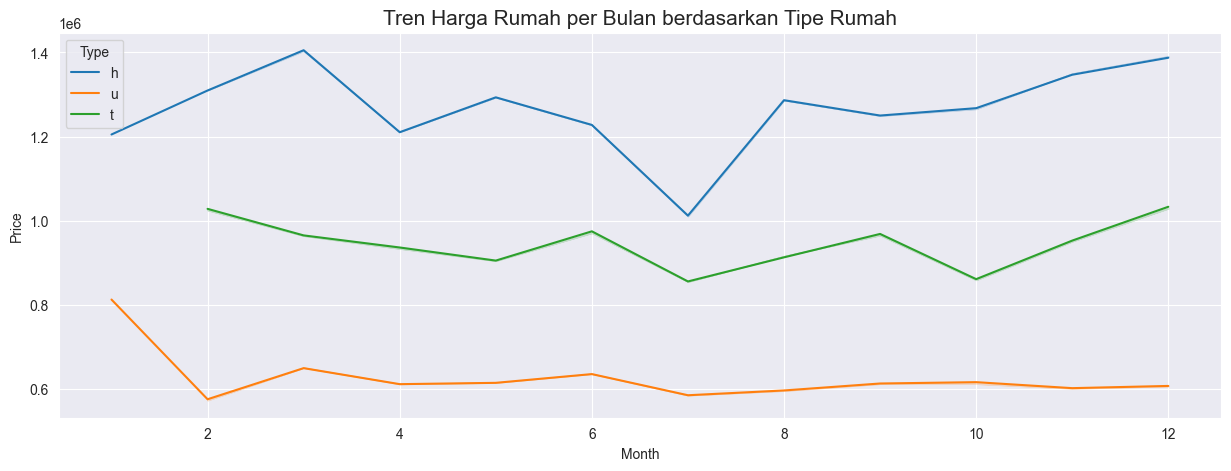

In [268]:
df['Date'].dtype

df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")

df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))


plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(
    data = df,
    x = 'Month',
    y = 'Price',
    hue = 'Type',
    ci=0
)
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah',size=15)
#plt.xticks(df['Date'],rotation = 90)
plt.show()

**INSIGHT :**
- Harga rumah bila dilihat berdasrkan tipe cukup stabil untuk tipe U dan T, terkecuali tipe H yang memiliki kenaikan tren harga.
- Secara garis besar terdapat penurunan harga rumah antara bulan ke-6 dan bulan ke-7

## NOMOR 6

a) Kelompokkan total luas tanah (kolom “Landsize”) berdasarkan region (kolom “Regionname”), lalu simpan ke dalam sebuah DataFrame baru!

b) Dari DataFrame baru tersebut, buatlah Pie Chart (diagram lingkaran) untuk menampilkan proporsi total luas tanah di tiap region!

c) Tambahkan explode agar potongan diagram seakan terpisah!

d) Tambahkan judul ‘Proporsi Luas Tanah tiap Region’ berukuran 20!

e) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

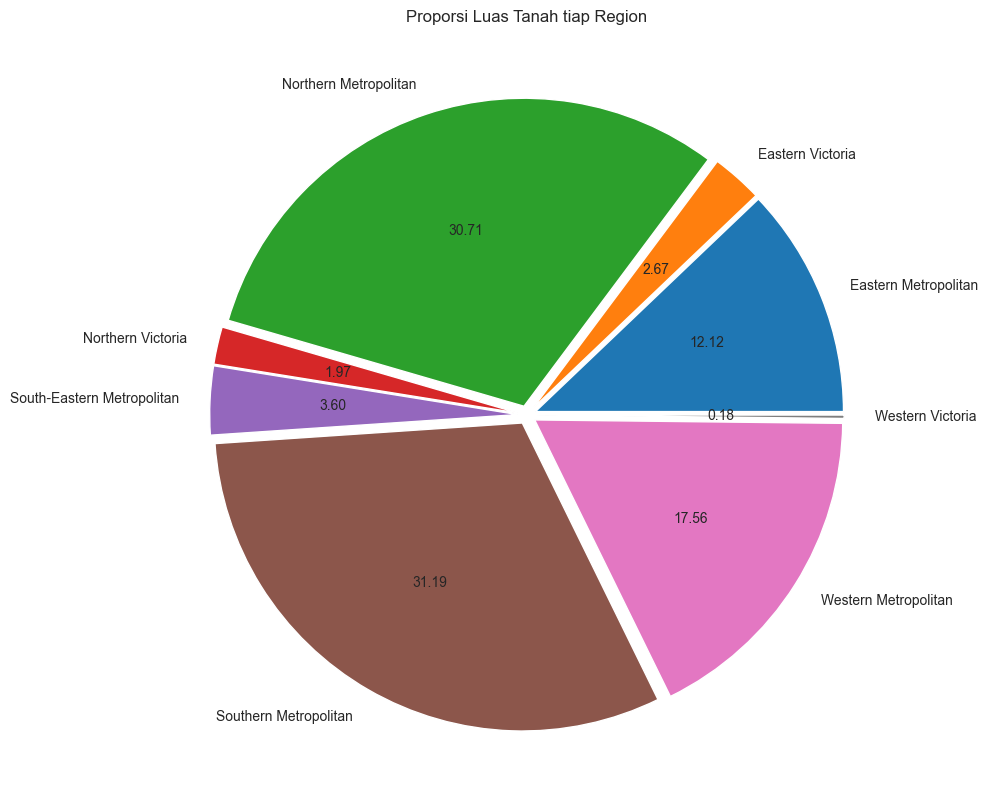

In [269]:
dfRegionLandSize = df.groupby('Regionname')['Landsize'].sum().reset_index()
sumLandSize = dfRegionLandSize['Landsize'].sum()
dfRegionLandSize['LandPercent'] = dfRegionLandSize['Landsize']/sumLandSize

plt.figure(figsize=(10,10))

plt.pie(
    x = dfRegionLandSize['LandPercent'],
    labels = dfRegionLandSize['Regionname'],
    autopct='%.2f',
    explode= [0.03] * len(dfRegionLandSize)
)

plt.title('Proporsi Luas Tanah tiap Region')

plt.show()

**INSIGHT :**
- Luas Tanah untuk properti di dominasi dengan region Southern Metropolitan (31.19) dan Notthern Metrpolitan (30.71)
- Luas kedua tanah tersebut mendominasi sampai dengan lebih dari setengah keseluruhan luas tanah untuk proerti di daerah tersebut.

## NOMOR 7
a) Buatlah terlebih dahulu correlation matrix yang berisi korelasi kolom “Price”, “Distance”, “Landsize”, dan “Rooms”!

b) Dari correlation matrix ini, buatlah Correlation Heatmap untuk memvisualisasikan korelasi antar variabel!

c) Tampilkan data korelasi di heatmap (annot = True) !

d) Tambahkan judul ‘Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar’ berukuran 20!

e) Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

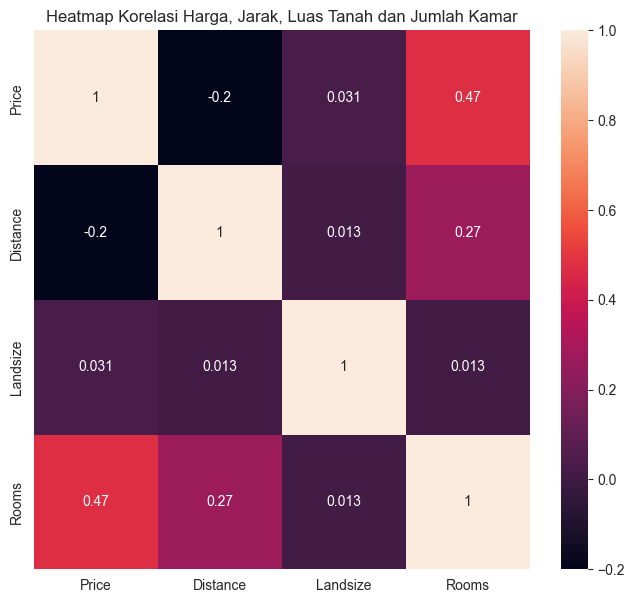

In [277]:
dfMatrixCorr = df[['Price','Distance','Landsize','Rooms']].corr()

plt.figure(figsize=(8,7))

sns.heatmap(
    data = dfMatrixCorr,
    annot=True
)

plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar')


plt.show()

**INSIGHT :**
- Price dan Rooms memiliki korelasi positif tingkat middle.